In [9]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=11a569f6be25173495b57092ed2692ef74efc24031cf986680be0f3574818243
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [10]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=4e901302ac4e08198e31fdda7551d44a6a57bb777c7608332db846876cf1cef6
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [2]:
import pandas as pd

In [40]:
tweet = pd.read_csv("/content/drive/MyDrive/reliance_tweet.csv")

In [41]:
tweet = tweet.drop(['date.1'], axis = 1)
tweet.head()

,date,tweet_processed,score,sentiment
0,2015-01-16,reliance industry alok agarwal cfo took measu...,0.6705,1
1,2015-01-20,how reliance life insurance uses tech to impro...,0.4404,1
2,2015-02-04,applicants list payments bank ab nuvo relianc...,0.0000,1
3,2015-03-27,nifty breaches reliance idea fall,0.4019,1
4,2015-04-20,global cues negative can reliance q nos lift n...,-0.4588,-1


In [45]:
tweet['date'] = pd.to_datetime(tweet['date'])
print(tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             573 non-null    datetime64[ns]
 1   tweet_processed  573 non-null    object        
 2   score            573 non-null    float64       
 3   sentiment        573 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 18.0+ KB
None


In [11]:
#reading historic data using yfinance
from datetime import date
import yfinance as yf
from yahoofinancials import YahooFinancials
reliance_df = yf.download('RELIANCE.NS', 
                      start='2015-01-01', 
                      end= date.today() , 
                      progress=False)
print(reliance_df.head())
print(reliance_df.tail())

                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2015-01-01  443.149994  446.000000  441.825012  443.950012  415.367096  1354878
2015-01-02  444.049988  448.024994  442.149994  442.774994  414.267700  3351654
2015-01-05  442.500000  445.450012  437.049988  437.924988  409.729980  4619182
2015-01-06  435.000000  436.500000  416.000000  418.049988  391.134613  8516086
2015-01-07  418.549988  429.399994  418.500000  427.149994  399.648712  9472630
                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2020-11-20  1975.000000  1983.800049  ...  1899.500000  26522972
2020-11-23  1951.000000  1970.000000  ...  1950.699951  20918665
2020-11-24  1964.000000  1974.000000  ...  1964.050049  14277083
2020-11-25  1980.000000  1992.949951  ...  1947.800049  15062376
2020-11-26  1953.050049  1965.000000  ...  1952.59

In [12]:
#import basic libraries and modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [13]:
#i am gonna predict the stock closing value 
reliance_df = reliance_df.reset_index()
df = reliance_df[["Date","Close"]]
df.head()

,Date,Close
0,2015-01-01,443.950012
1,2015-01-02,442.774994
2,2015-01-05,437.924988
3,2015-01-06,418.049988
4,2015-01-07,427.149994


In [ ]:
df = df.set_index('Date')

In [46]:
tweet = tweet.set_index('date')

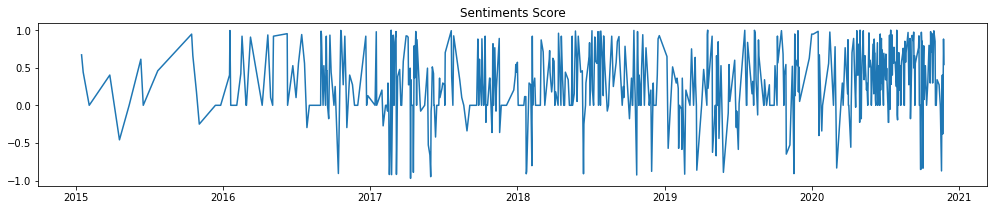

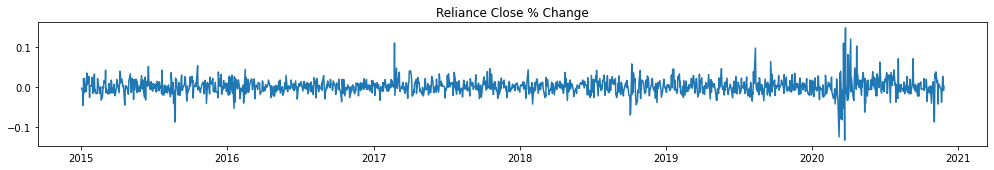

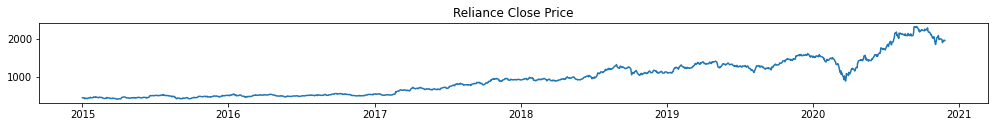

In [47]:
#plot
plt.figure(figsize=(17, 3))
plt.subplot(1,1,1)
plt.plot(tweet['score'])
plt.title("Sentiments Score")
plt.show()

plt.figure(figsize=(17, 5))
plt.subplot(2,1,1)
plt.plot(df['Close'].pct_change())
plt.title("Reliance Close % Change")
plt.show()

plt.figure(figsize=(17, 5))
plt.subplot(3,1,1)
plt.plot(df['Close'])
plt.title("Reliance Close Price")
plt.show()


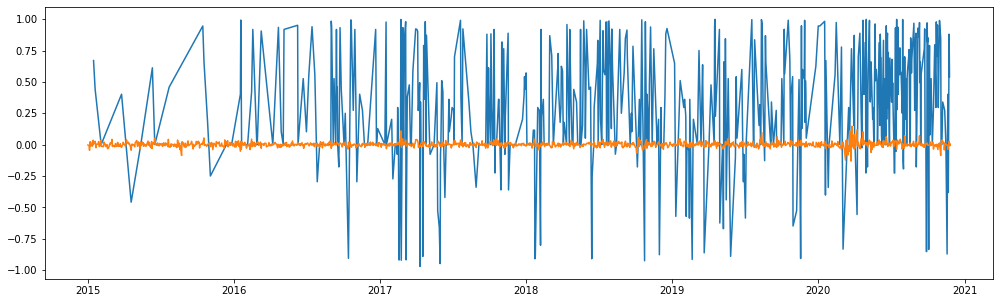

In [52]:
plt.figure(figsize=(17, 5))
plt.plot(tweet['score'])
plt.plot(df['Close'].pct_change())
plt.show()

In [55]:
#lets join data
data = df.join(tweet)

In [57]:
print(data.head())
print(data.tail())

                 Close tweet_processed  score  sentiment
Date                                                    
2015-01-01  443.950012             NaN    NaN        NaN
2015-01-02  442.774994             NaN    NaN        NaN
2015-01-05  437.924988             NaN    NaN        NaN
2015-01-06  418.049988             NaN    NaN        NaN
2015-01-07  427.149994             NaN    NaN        NaN
                  Close  ... sentiment
Date                     ...          
2020-11-20  1899.500000  ...       1.0
2020-11-23  1950.699951  ...       1.0
2020-11-24  1964.050049  ...       1.0
2020-11-25  1947.800049  ...       NaN
2020-11-26  1952.599976  ...       NaN

[5 rows x 4 columns]


In [59]:
#lets split the data into training, validation and test set
#keeping the ratio of 80:20
data_train, data_test = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
data_train.shape, data_test.shape

((1164, 2), (291, 2))

In [53]:
#lets split the data into training, validation and test set
#keeping the ratio of 80:20
data_train, data_test = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
data_train.shape, data_test.shape

((1164, 1), (291, 1))

In [61]:
#data scalling
#lstm is sensitive to the scale of data
from sklearn.preprocessing import MinMaxScaler
data_scaling1 = MinMaxScaler(feature_range=(0,1))
data_train_scaled = data_scaling1.fit_transform(data_train['Close'].values.reshape(-1, 1))
data_test_scaled = data_scaling1.transform(data_test['Close'].values.reshape(-1, 1))

data_scaling2 = MinMaxScaler()
training_compound_scaled = data_scaling2.fit_transform(data_train['sentiment'].values.reshape(-1, 1))
test_compound_scaled = data_scaling2.transform(data_test['sentiment'].values.reshape(-1, 1))

In [62]:
#creating matrix 
# references: https://www.youtube.com/watch?v=H6du_pfuznE
def create_dataset(dataset, score_vader, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		b = score_vader[i+look_back]
		dataX.append(np.append(a,b))
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
# creating dataset with the last 45 days historic data and sentiments score of todays news headlines
train_x, train_y = create_dataset(data_train_scaled, training_compound_scaled, 45)
test_x, test_y = create_dataset(data_test_scaled, test_compound_scaled, 45)

In [64]:
#check shape of data
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(1118, 46) (1118,)
(245, 46) (245,)


In [65]:
#creating arrays
#reshaping the input x dataset to 3 dimensions
train_x, train_y = np.array(train_x), np.array(train_y)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

test_x, test_y = np.array(test_x), np.array(test_y)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

In [86]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(train_x.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#reshaping data to three d
model.fit(train_x, train_y, validation_data = (train_x, train_y), epochs=50, batch_size=75)

Epoch 1/50
15/15 [==============================] - 3s 172ms/step - loss: 0.0714 - val_loss: 0.0165
Epoch 2/50
15/15 [==============================] - 2s 105ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 3/50
15/15 [==============================] - 2s 106ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 4/50
15/15 [==============================] - 2s 105ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/50
15/15 [==============================] - 2s 106ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
15/15 [==============================] - 2s 105ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
15/15 [==============================] - 2s 105ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
15/15 [==============================] - 2s 104ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
15/15 [==============================] - 2s 105ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/50
15/15 [==============================] - 2s 104ms/step - loss: 0.0014 - val_loss: 0.0014

In [87]:
train_predict = model.predict(train_x) 
test_predict = model.predict(test_x)
train_predict

array([[0.03190695],
       [0.03208575],
       [0.03201092],
       ...,
       [0.8209514 ],
       [0.79717445],
       [0.7995613 ]], dtype=float32)

In [88]:
#traonsform to orignal form
train_predict1 = data_scaling1.inverse_transform(train_predict) 
test_predict1 = data_scaling1.inverse_transform(test_predict) 
print(train_predict1)

[[ 437.39282]
 [ 437.57227]
 [ 437.49716]
 ...
 [1229.1792 ]
 [1205.3196 ]
 [1207.7148 ]]


In [89]:
train_y_re = data_scaling1.inverse_transform(train_y.reshape(-1,1))
test_y_re = data_scaling1.inverse_transform(test_y.reshape(-1,1))

In [90]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("RMSE for train dataset:", math.sqrt(mean_squared_error(train_y_re,train_predict1)))

RMSE for train dataset: 28.1198152136986


In [91]:
print("RMSE for test dataset:", math.sqrt(mean_squared_error(test_y_re,test_predict1)))

RMSE for test dataset: 142.32001618119457


In [92]:
result_train = data_train.iloc[46:]
result_test = data_test.iloc[46:]
print(result_train.shape)
print(result_test.shape)

(1118, 2)
(245, 2)


In [93]:
result_train['predict'] = train_predict1
result_test['predict'] = test_predict1
result_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sentiment,Close,predict
Date,,,
2019-12-05,0.0,1550.849976,1527.998901
2019-12-06,0.0,1554.900024,1527.569336
2019-12-09,0.0,1572.599976,1524.900146
2019-12-10,0.0,1561.949951,1521.272705
2019-12-11,0.0,1562.400024,1518.926392


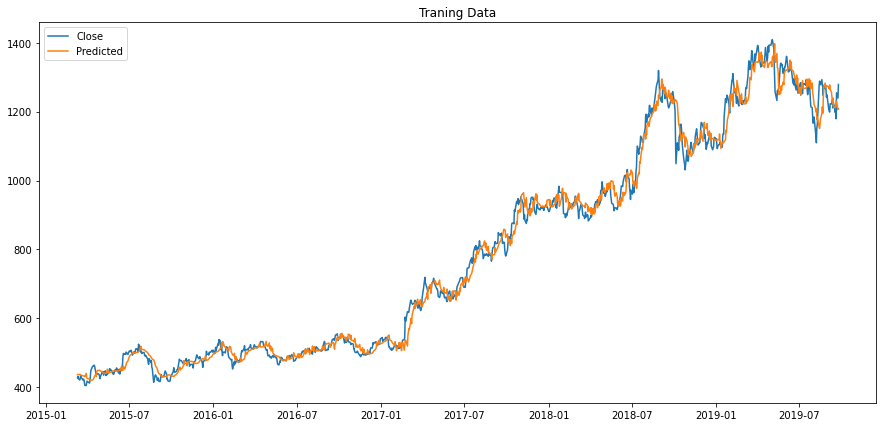

In [98]:
#plotting training data
plt.figure(figsize=(15, 7))
plt.plot(result_train['Close'], label = "Close")
plt.plot(result_train['predict'], label = "Predicted")
plt.title("Traning Data")
plt.legend()
plt.show()

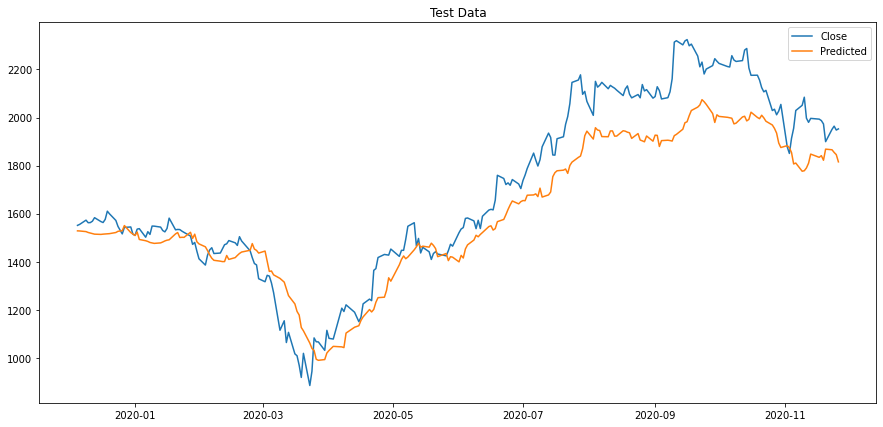

In [100]:
#plotting training data
plt.figure(figsize=(15, 7))
plt.plot(result_test['Close'], label = "Close")
plt.plot(result_test['predict'], label = "Predicted")
plt.title("Test Data")
plt.legend()
plt.show()